### Moving Average assumption when time series is stationary and Slow varying mean


In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
from datetime import datetime
mpl.rcParams['figure.figsize'] =(10,8)
mpl.rcParams['axes.grid'] = False

In [31]:
def parse(x):
    return datetime.strptime(x,'%m %d %y')

In [40]:
df= pd.read_csv("electricity_consumption.csv",parse_dates=['Bill_Date'])

In [37]:
df.head(5)

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


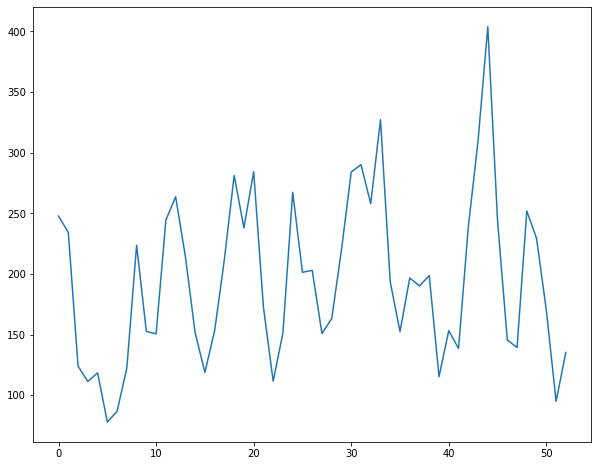

In [9]:
plt.plot(df['Billed_amount'])

In [41]:
df.set_index('Bill_Date',inplace=True)

In [44]:
df.head(3)

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29


### MOVING AVERAGE

### simple moving average  = (t+(t-1)+(t-2) +...+(t-n)) / n 

In [48]:
df_2016 = df['2016':'2018'][['Billed_amount']]

In [54]:
df_2016['MA'] = df_2016['Billed_amount'].rolling(window=3).mean().shift(1)

In [58]:
df_2016.head(10)

,Billed_amount,MA
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


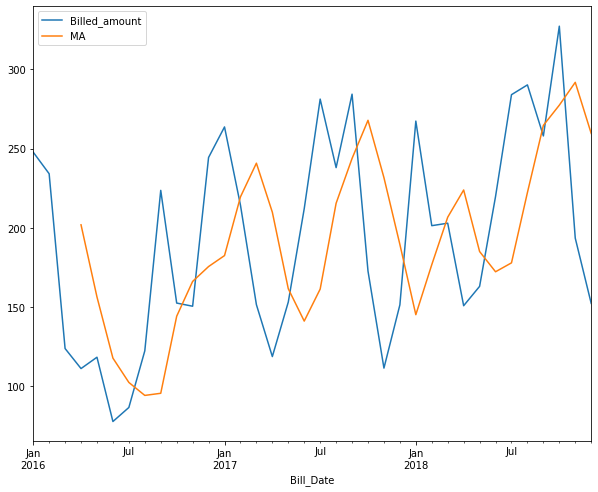

In [61]:
df_2016.plot()

### WEIGHTED MOVING AVERAGE

#### WEIGHTED MOVING AVERAGE - ((t*weight) +(t-1)*(weight-1) + (t-2)*(weight-1) +...+ (t-n)*(weight-n)) / n

In [62]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [65]:
df_2016['WMA'] = df_2016['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [66]:
df_2016

,Billed_amount,MA,WMA
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


In [70]:
df_2016.head(10)

,Billed_amount,MA,WMA
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


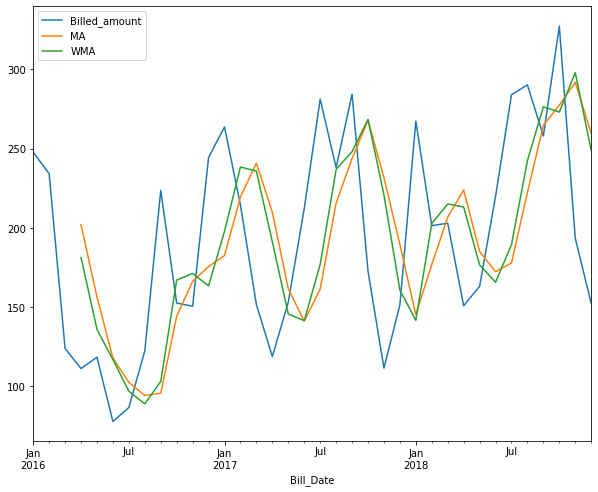

In [68]:
df_2016.plot()

### EXPONENTIAL MOVING AVERAGE

#### (CLose-previous EMA) * (2/(span+1)) + previous EMA

In [72]:
df_2016['EMA'] = df_2016['Billed_amount'].ewm(span=3,adjust=False,min_periods=0).mean().shift(1)

In [82]:
df_2016.head(10)

,Billed_amount,MA,WMA,EMA
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,181.250000,182.385000
2016-05-01,118.37,156.393333,135.911667,146.802500
2016-06-01,77.81,117.813333,116.900000,132.586250
2016-07-01,86.67,102.466667,96.898333,105.198125
2016-08-01,122.40,94.283333,89.000000,95.934063
2016-09-01,223.62,95.626667,103.058333,109.167031


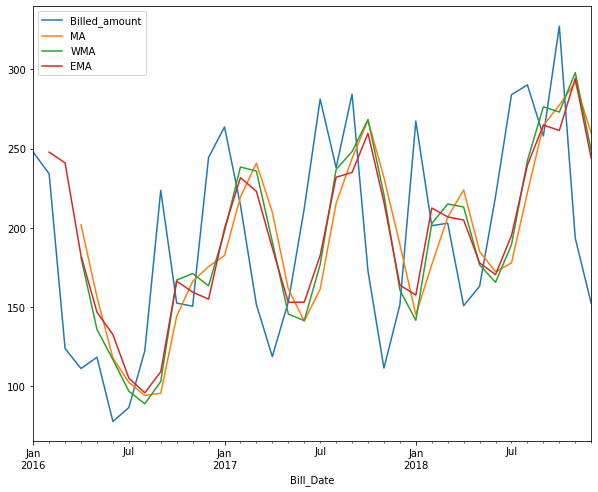

In [81]:
df_2016.plot()

### EXPONENTIAL SMOOTHING

In [83]:
df_2016['ESA'] = df_2016['Billed_amount'].ewm(alpha=0.7 ,adjust=False,min_periods=3).mean().shift(1)

In [84]:
df_2016.head(10)

,Billed_amount,MA,WMA,EMA,ESA
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,158.153800
2016-05-01,118.37,156.393333,135.911667,146.802500,125.300140
2016-06-01,77.81,117.813333,116.900000,132.586250,120.449042
2016-07-01,86.67,102.466667,96.898333,105.198125,90.601713
2016-08-01,122.40,94.283333,89.000000,95.934063,87.849514
2016-09-01,223.62,95.626667,103.058333,109.167031,112.034854


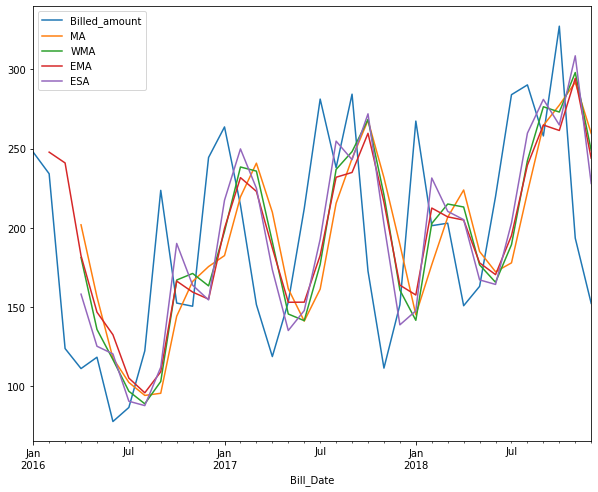

In [86]:
df_2016.plot()

#### CALCULATING RMSE ACCURACY

In [87]:
((df_2016['Billed_amount'] - df_2016['MA'])**2).mean()**0.5

70.98561687433802

In [89]:
((df_2016['Billed_amount'] - df_2016['WMA'])**2).mean()**0.5

65.82572602256133

In [90]:
((df_2016['Billed_amount'] - df_2016['EMA'])**2).mean()**0.5

64.32131239414655

In [91]:
((df_2016['Billed_amount'] - df_2016['ESA'])**2).mean()**0.5

61.26408398853503